In [1]:
import spc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from TransformFun import *
from sklearn.decomposition import PCA

# Read a simple spectra file
Returns a pandas series with spectra

In [4]:
from pyspectra.readers.read_dx import read_from_dx 

ModuleNotFoundError: No module named 'pyspectra'

gx-y(1)


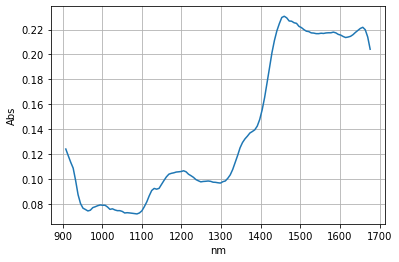

In [3]:
spc=ReadSpectra('SampleSpectra/VIAVI/JDSU_Phar_Rotate_S06_1_20171009_1540.spc')
spc.plot()
plt.xlabel("nm")
plt.ylabel("Abs")
plt.grid(True)

# Read all spc files from a folder
Returns a pandas  row wise pandas dataframe.


gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)


,JDSU_Phar_Rotate_S06_1_20171009_1540.spc,JDSU_Phar_Rotate_S11_2_20171009_1614.spc,JDSU_Phar_Rotate_S17_1_20171009_1652.spc,JDSU_Phar_Rotate_S23_1_20171009_1734.spc,JDSU_Phar_Rotate_S30_2_20171009_1815.spc,JDSU_Phar_Rotate_S37_2_20171009_1853.spc,JDSU_Phar_Rotate_S43_2_20171009_1928.spc,JDSU_Phar_Rotate_S49_1_20171009_2000.spc
908.100000,0.123968,0.164750,0.156647,0.147828,0.182833,0.171957,0.164471,0.149373
914.294355,0.118613,0.159980,0.150746,0.142974,0.178452,0.166827,0.159545,0.142818
920.488710,0.113342,0.155193,0.144959,0.138178,0.173734,0.161695,0.154330,0.136648
926.683065,0.108641,0.151398,0.140178,0.134014,0.170061,0.157110,0.149876,0.130452
932.877419,0.098678,0.141859,0.129715,0.124426,0.160590,0.147076,0.140119,0.119561
...,...,...,...,...,...,...,...,...
1651.422581,0.220935,0.262070,0.259643,0.242916,0.279041,0.271492,0.260664,0.252704
1657.616935,0.221848,0.262732,0.260664,0.243092,0.278962,0.272893,0.261647,0.254481
1663.811290,0.219904,0.260335,0.258975,0.240656,0.276382,0.271624,0.260278,0.253761
1670.005645,0.214080,0.253475,0.253110,0.234047,0.269528,0.265615,0.254568,0.248288


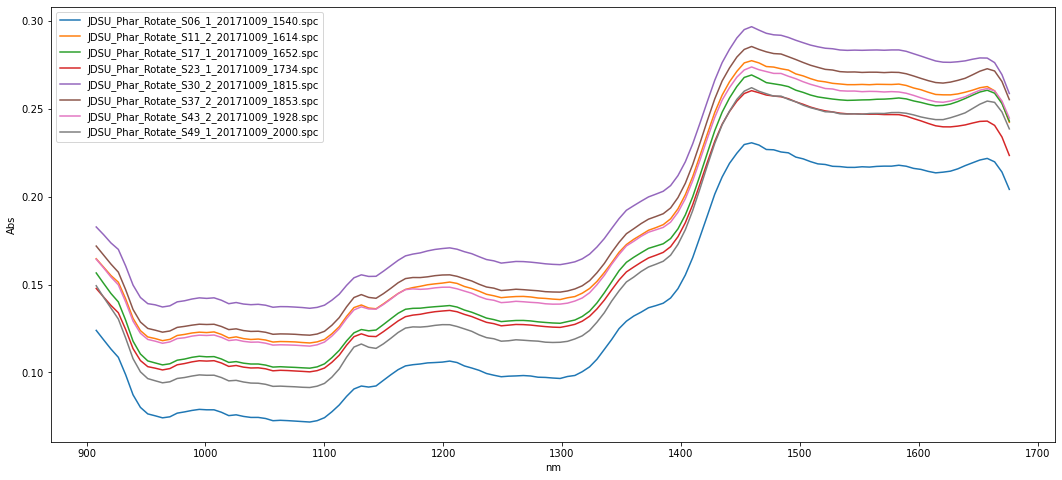

In [4]:
df_spc, dict_spc=ReadFromDir('SampleSpectra/VIAVI')
display(df_spc.transpose())
f, ax =plt.subplots(1, figsize=(18,8))
ax.plot(df_spc.transpose())
plt.xlabel("nm")
plt.ylabel("Abs")
ax.legend(labels= list(df_spc.transpose().columns))
plt.show()

# Apply spectra transformations: Multiple scattering correction

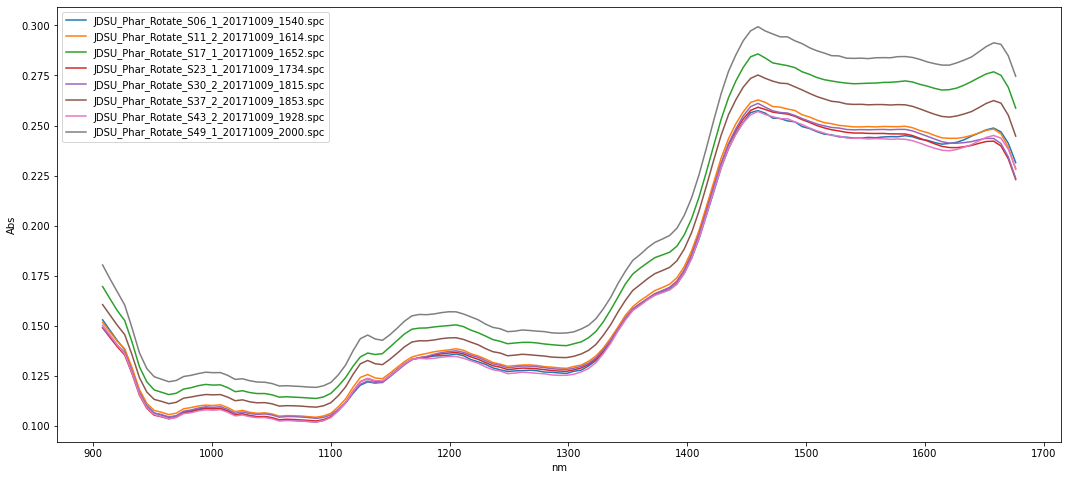

In [5]:
msc=MSC()
spc_msc= msc.fit_transform(df_spc)
f, ax =plt.subplots(1, figsize=(18,8))
ax.plot(spc_msc.transpose())
plt.xlabel("nm")
plt.ylabel("Abs")
ax.legend(labels= list(df_spc.transpose().columns))
plt.show()

# Decompose using PCA

Text(0, 0.5, ' cumulative % of explained variance')

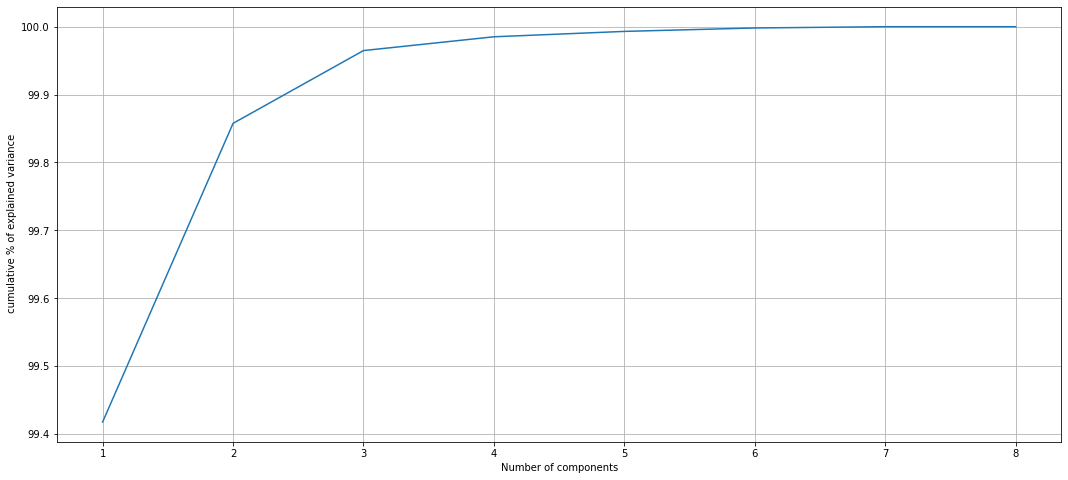

In [6]:
pca=PCA()
pca.fit(spc_msc)
plt.figure(figsize=(18,8))
plt.plot(range(1,len(pca.explained_variance_)+1),100*pca.explained_variance_.cumsum()/pca.explained_variance_.sum())
plt.grid(True)
plt.xlabel("Number of components")
plt.ylabel(" cumulative % of explained variance")

,0,1,2,3,4,5,6,7
0,-0.087885,0.015026,-0.003505,-0.000978,0.000751,-0.000154,0.000498,1.691355e-16
1,-0.057469,-0.004515,-0.000804,-0.001682,0.000567,0.001642,-0.000551,1.719545e-16
2,0.130959,0.002569,-0.004584,0.002982,-0.000694,0.000592,-0.000120,1.804112e-16
3,-0.087047,-0.008639,0.001383,0.002141,0.001786,-0.000513,0.000169,1.713039e-16
4,-0.076666,-0.009602,-0.004676,-0.001242,-0.001341,-0.000962,0.000031,1.721713e-16
5,0.039404,-0.002612,0.005238,-0.000319,-0.000914,0.000656,0.000952,1.741229e-16
6,-0.098231,0.007465,0.005504,0.000763,-0.000940,-0.000470,-0.000715,1.726050e-16
7,0.236935,0.000307,0.001445,-0.001665,0.000784,-0.000790,-0.000265,1.864828e-16


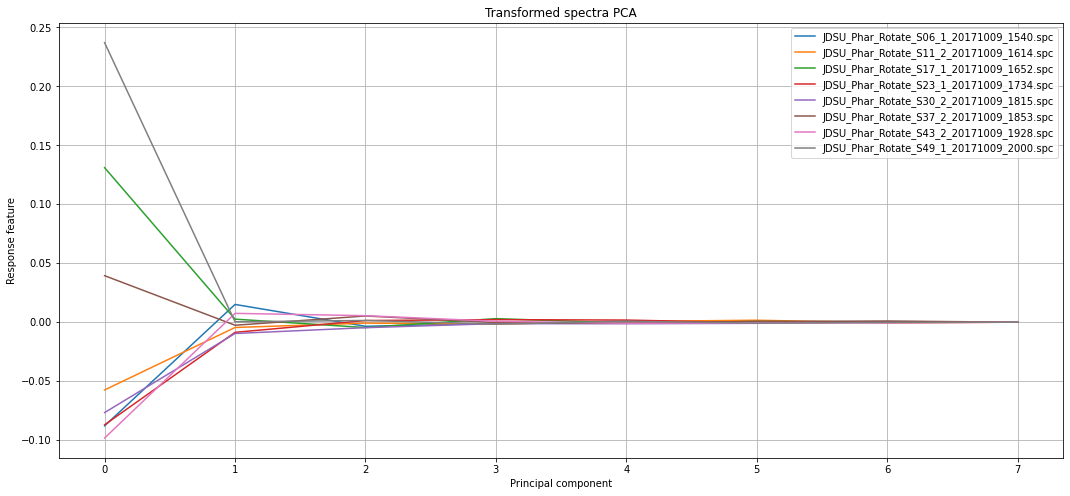

In [7]:
df_pca=pd.DataFrame(pca.transform(spc_msc))
plt.figure(figsize=(18,8))
plt.plot(df_pca.transpose())
display(df_pca)
plt.legend(labels=list(spc_msc.transpose().columns))
plt.title("Transformed spectra PCA")
plt.ylabel("Response feature")
plt.xlabel("Principal component")
plt.grid(True)
plt.show()